In [5]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '94e16e97-491e-4ca2-9d73-63402015be08',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-06T11:52:09.736Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 10042}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11627, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [6]:
type(data)

dict

In [35]:
import pandas as pd
#pd.set_option('display.max_columns',2) will show only two columns excluding index
pd.set_option('display.max_columns',None)# none means there is no limit to the number of columns to be presented
pd.set_option('display.max_rows',None) # this command is not working i don't know why

In [ ]:
df=pd.json_normalize(data['data'])

In [ ]:
# in order to be able to see what time is the data getting pulled, a new column for timestamp can be added
df['timestamp']=pd.to_datetime('now')

In [ ]:
df

In [60]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '94e16e97-491e-4ca2-9d73-63402015be08',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df=pd.concat([df,df2])

    if not os.path.isfile(r'C:\Users\Win10\Desktop\dataset\API.csv'):
        df.to_csv(r'C:\Users\Win10\Desktop\dataset\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Win10\Desktop\dataset\API.csv',mode='a',header=False)

In [62]:
import os # provides a way for interacting with operating system includes functions for handling files and directories
from time import time 
from time import sleep

for i in range(333):# because we have a maximum of 333 calls each day
    api_runner()
    print('API runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

API runner completed successfully


KeyboardInterrupt: 

In [48]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11627,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973637e+07,1.973637e+07,False,NaN,1,NaN,NaN,None,2024-08-06T11:51:00.000Z,55284.579676,7.102735e+10,-15.1318,0.491147,7.736478,-17.024106,-3.716128,-22.738425,-11.378550,1.091117e+12,55.6811,1.160976e+12,None,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
1,1027,Ethereum,ETH,ethereum,9190,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202570e+08,1.202570e+08,True,NaN,2,NaN,NaN,None,2024-08-06T11:50:00.000Z,2464.679368,3.700318e+10,-36.5427,0.332710,8.724511,-26.218785,-18.169019,-35.673175,-17.775197,2.963949e+11,15.1509,2.963949e+11,None,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
2,825,Tether USDt,USDT,tether,93609,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145277e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-06T11:50:00.000Z,1.000443,1.166291e+11,-23.9405,0.007121,0.053673,0.057439,0.054740,0.105866,0.048941,1.145784e+11,5.8584,1.171200e+11,None,2024-08-06T11:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-06 17:22:13.065101
3,1839,BNB,BNB,bnb,2205,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459369e+08,1.459369e+08,False,NaN,4,NaN,NaN,None,2024-08-06T11:50:00.000Z,480.361134,2.823925e+09,-29.4699,0.413303,11.865525,-16.254232,-5.439319,-31.761792,-17.944452,7.010242e+10,3.5835,7.010242e+10,None,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.655838e+08,5.816504e+08,True,NaN,5,NaN,NaN,None,2024-08-06T11:50:00.000Z,140.611768,8.686430e+09,-22.8305,1.157246,22.568084,-22.283088,0.783412,-18.237526,-3.589538,6.546656e+10,3.3470,8.178689e+10,None,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
5,3408,USDC,USDC,usd-coin,21373,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.397995e+10,3.397995e+10,False,NaN,6,NaN,NaN,None,2024-08-06T11:50:00.000Z,1.000126,1.533231e+10,-20.1247,0.007318,0.020036,0.012411,0.013958,0.015607,0.012685,3.398422e+10,1.7355,3.398422e+10,None,2024-08-06T11:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-06 17:22:13.065101
6,52,XRP,XRP,xrp,1361,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-06T11:51:00.000Z,0.505824,2.540866e+09,-25.5398,1.051981,12.682073,-20.168957,16.532232,-4.071661,-2.979285,2.832575e+10,1.4483,5.058235e+10,None,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
7,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.454213e+11,1.454213e+11,True,NaN,8,NaN,NaN,None,2024-08-06T11:51:00.000Z,0.096530,1.864870e+09,-23.2692,0.444301,16.129887,-25.320386,-12.315522,-40.033464,-34.573708,1.403752e+10,0.7176,1.403752e+10,None,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
8,11419,Toncoin,TON,toncoin,491,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...

In [66]:
df72=pd.read_csv(r'C:\Users\Win10\Desktop\dataset\API.csv')

In [68]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11627,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.973637e+07,1.973637e+07,False,NaN,1,NaN,NaN,NaN,2024-08-06T11:51:00.000Z,55284.579676,7.102735e+10,-15.1318,0.491147,7.736478,-17.024106,-3.716128,-22.738425,-11.378550,1.091117e+12,55.6811,1.160976e+12,NaN,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
1,1,1027,Ethereum,ETH,ethereum,9190,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202570e+08,1.202570e+08,True,NaN,2,NaN,NaN,NaN,2024-08-06T11:50:00.000Z,2464.679368,3.700318e+10,-36.5427,0.332710,8.724511,-26.218785,-18.169019,-35.673175,-17.775197,2.963949e+11,15.1509,2.963949e+11,NaN,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
2,2,825,Tether USDt,USDT,tether,93609,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.145277e+11,1.170681e+11,True,NaN,3,NaN,NaN,NaN,2024-08-06T11:50:00.000Z,1.000443,1.166291e+11,-23.9405,0.007121,0.053673,0.057439,0.054740,0.105866,0.048941,1.145784e+11,5.8584,1.171200e+11,NaN,2024-08-06T11:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-06 17:22:13.065101
3,3,1839,BNB,BNB,bnb,2205,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459369e+08,1.459369e+08,False,NaN,4,NaN,NaN,NaN,2024-08-06T11:50:00.000Z,480.361134,2.823925e+09,-29.4699,0.413303,11.865525,-16.254232,-5.439319,-31.761792,-17.944452,7.010242e+10,3.5835,7.010242e+10,NaN,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
4,4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.655838e+08,5.816504e+08,True,NaN,5,NaN,NaN,NaN,2024-08-06T11:50:00.000Z,140.611768,8.686430e+09,-22.8305,1.157246,22.568084,-22.283088,0.783412,-18.237526,-3.589538,6.546656e+10,3.3470,8.178689e+10,NaN,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
5,5,3408,USDC,USDC,usd-coin,21373,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.397995e+10,3.397995e+10,False,NaN,6,NaN,NaN,NaN,2024-08-06T11:50:00.000Z,1.000126,1.533231e+10,-20.1247,0.007318,0.020036,0.012411,0.013958,0.015607,0.012685,3.398422e+10,1.7355,3.398422e+10,NaN,2024-08-06T11:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-06 17:22:13.065101
6,6,52,XRP,XRP,xrp,1361,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,NaN,2024-08-06T11:51:00.000Z,0.505824,2.540866e+09,-25.5398,1.051981,12.682073,-20.168957,16.532232,-4.071661,-2.979285,2.832575e+10,1.4483,5.058235e+10,NaN,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
7,7,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.454213e+11,1.454213e+11,True,NaN,8,NaN,NaN,NaN,2024-08-06T11:51:00.000Z,0.096530,1.864870e+09,-23.2692,0.444301,16.129887,-25.320386,-12.315522,-40.033464,-34.573708,1.403752e+10,0.7176,1.403752e+10,NaN,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
8,8,11419,Toncoin,TON,toncoin,491,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-e

In [82]:
pd.set_option('display.float_format', lambda x:'%.5f' %x)

In [84]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11627,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19736368.00000,19736368.00000,False,NaN,1,NaN,NaN,None,2024-08-06T11:51:00.000Z,55284.57968,71027347388.72955,-15.13180,0.49115,7.73648,-17.02411,-3.71613,-22.73842,-11.37855,1091116809220.01477,55.68110,1160976173205.73999,None,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
1,1027,Ethereum,ETH,ethereum,9190,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120256976.78192,120256976.78192,True,NaN,2,NaN,NaN,None,2024-08-06T11:50:00.000Z,2464.67937,37003178468.13866,-36.54270,0.33271,8.72451,-26.21879,-18.16902,-35.67318,-17.77520,296394889542.47156,15.15090,296394889542.46997,None,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
2,825,Tether USDt,USDT,tether,93609,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114527666301.09631,117068083201.92928,True,NaN,3,NaN,NaN,None,2024-08-06T11:50:00.000Z,1.00044,116629050400.93256,-23.94050,0.00712,0.05367,0.05744,0.05474,0.10587,0.04894,114578415933.05206,5.85840,117119958546.36000,None,2024-08-06T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-06 17:22:13.065101
3,1839,BNB,BNB,bnb,2205,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936902.99883,145936902.99883,False,NaN,4,NaN,NaN,None,2024-08-06T11:50:00.000Z,480.36113,2823924774.09268,-29.46990,0.41330,11.86552,-16.25423,-5.43932,-31.76179,-17.94445,70102416145.31752,3.58350,70102416145.32001,None,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465583807.89659,581650425.39056,True,NaN,5,NaN,NaN,None,2024-08-06T11:50:00.000Z,140.61177,8686430193.89408,-22.83050,1.15725,22.56808,-22.28309,0.78341,-18.23753,-3.58954,65466562565.14017,3.34700,81786894902.77000,None,2024-08-06T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
5,3408,USDC,USDC,usd-coin,21373,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33979954665.69915,33979954665.69915,False,NaN,6,NaN,NaN,None,2024-08-06T11:50:00.000Z,1.00013,15332307463.94541,-20.12470,0.00732,0.02004,0.01241,0.01396,0.01561,0.01269,33984224061.62226,1.73550,33984224061.62000,None,2024-08-06T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-06 17:22:13.065101
6,52,XRP,XRP,xrp,1361,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-06T11:51:00.000Z,0.50582,2540866259.09935,-25.53980,1.05198,12.68207,-20.16896,16.53223,-4.07166,-2.97928,28325754968.27424,1.44830,50582352077.15000,None,2024-08-06T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-06 17:22:13.065101
7,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145421276383.70520,145421276383.70520,True,NaN,8,NaN,NaN,None,2024-08-06T11:51:00.000Z,0.09653,1864869732.03878,-23.26920,0.44430,16.12989,-25.32039,-12.31552,-40.03346,-34.57371,14037520311.59914,0.71760,14037520311.60000,None,2024-08-06T1

In [106]:
#df.groupby('name')[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean().sort_values(by='quote.USD.percent_change_90d',ascending=False)

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
TRON,0.36045,3.14212,-9.36640,-5.04800,7.12117,0.06601
Tether USDt,-0.00843,0.02277,0.04766,0.05324,0.09391,0.04406
USDC,-0.00437,0.00190,-0.00319,0.00869,0.00242,0.00598
XRP,0.97703,12.15076,-20.11343,16.10131,-4.19528,-3.08238
Solana,0.46339,21.25994,-22.63664,-0.31846,-18.87461,-4.03046
Toncoin,0.26911,8.00854,-17.41211,-27.63124,-26.80219,-4.32357
Bitcoin,0.51021,8.87524,-16.82149,-3.78933,-22.92979,-11.23781
Ethereum,0.28731,8.87831,-26.16446,-18.40266,-35.72454,-17.77309
BNB,0.20788,11.78804,-16.42791,-5.90776,-32.01206,-18.09177


In [110]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [124]:
df4=df3.stack() # sort of converts dataframe into series ...pivots the dataframe columns into rows stackinfg them under the previous indexes

In [264]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.51021,8.87524,-16.82149,-3.78933,-22.92979,-11.23781
Ethereum,0.28731,8.87831,-26.16446,-18.40266,-35.72454,-17.77309
Tether USDt,-0.00843,0.02277,0.04766,0.05324,0.09391,0.04406
BNB,0.20788,11.78804,-16.42791,-5.90776,-32.01206,-18.09177
Solana,0.46339,21.25994,-22.63664,-0.31846,-18.87461,-4.03046
USDC,-0.00437,0.00190,-0.00319,0.00869,0.00242,0.00598
XRP,0.97703,12.15076,-20.11343,16.10131,-4.19528,-3.08238
Dogecoin,0.36064,14.30426,-25.44416,-12.85569,-40.35389,-34.61991
Toncoin,0.26911,8.00854,-17.41211,-27.63124,-26.80219,-4.32357


In [126]:
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.51021
              quote.USD.percent_change_24h     8.87524
              quote.USD.percent_change_7d    -16.82149
              quote.USD.percent_change_30d    -3.78933
              quote.USD.percent_change_60d   -22.92979
              quote.USD.percent_change_90d   -11.23781
Ethereum      quote.USD.percent_change_1h      0.28731
              quote.USD.percent_change_24h     8.87831
              quote.USD.percent_change_7d    -26.16446
              quote.USD.percent_change_30d   -18.40266
              quote.USD.percent_change_60d   -35.72454
              quote.USD.percent_change_90d   -17.77309
Tether USDt   quote.USD.percent_change_1h     -0.00843
              quote.USD.percent_change_24h     0.02277
              quote.USD.percent_change_7d      0.04766
              quote.USD.percent_change_30d     0.05324
              quote.USD.percent_change_60d     0.09391
              quote.US

In [128]:
type(df3) # dataframe is 2 dimsional data structure with rows and columns... it can be thought of as a collection of series object where each column is a series


pandas.core.frame.DataFrame

In [130]:
type(df4)# series is 1 dimensional labelled array... it can be thought of as a column of data with index

pandas.core.series.Series

In [282]:
df5=df4.to_frame(name='values') # using column header as rows under the same index

In [284]:
type(df5)
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.51021
             quote.USD.percent_change_24h   8.87524
             quote.USD.percent_change_7d  -16.82149
             quote.USD.percent_change_30d  -3.78933
             quote.USD.percent_change_60d -22.92979
             quote.USD.percent_change_90d -11.23781
Ethereum     quote.USD.percent_change_1h    0.28731
             quote.USD.percent_change_24h   8.87831
             quote.USD.percent_change_7d  -26.16446
             quote.USD.percent_change_30d -18.40266
             quote.USD.percent_change_60d -35.72454
             quote.USD.percent_change_90d -17.77309
Tether USDt  quote.USD.percent_change_1h   -0.00843
             quote.USD.percent_change_24h   0.02277
             quote.USD.percent_change_7d    0.04766
             quote.USD.percent_change_30d   0.05324
             quote.USD.percent_change_60d   0.09391
             quote.USD.percent_change_90d   0.04406
BNB          quote.USD.percent_change_1h    0.20788
             quote.USD.percent_change_24h  11.78804
             quote.USD.percent_change_7d  -16.42791
             quote.USD.percent_change_30d  -5.90776
             quote.USD.percent_change_60d -32.01206
             quote.USD.percent_change_90d -18.09177
Solana       quote.USD.percent_change_1h    0.46339
             quote.USD.percent_change_24h  21.25994
             quote.USD.percent_change_7d  -22.63664
             quote.USD.percent_change_30d  -0.31846
             quote.USD.percent_change_60d -18.87461
             quote.USD.percent_change_90d  -4.03046
USDC         quote.USD.percent_change_1h   -0.00437
             quote.USD.percent_change_24h   0.00190
             quote.USD.percent_change_7d   -0.00319
             quote.USD.percent_change_30d   0.00869
             quote.USD.percent_change_60d   0.00242
             quote.USD.percent_change_90d   0.00598
XRP          quote.USD.percent_change_1h    0.97703
             quote.USD.percent_change_24h  12.15076
             quote.USD.percent_change_7d  -20.11343
             quote.USD.percent_change_30d  16.10131
             quote.USD.percent_change_60d  -4.19528
             quote.USD.percent_change_90d  -3.08238
Dogecoin     quote.USD.percent_change_1h    0.36064
             quote.USD.percent_change_24h  14.30426
             quote.USD.percent_change_7d  -25.44416
             quote.USD.percent_change_30d -12.85569
             quote.USD.percent_change_60d -40.35389
             quote.USD.percent_change_90d -34.61991
Toncoin      quote.USD.percent_change_1h    0.26911
             quote.USD.percent_change_24h   8.00854
             quote.USD.percent_change_7d  -17.41211
             quote.USD.percent_change_30d -27.63124
             quote.USD.percent_change_60d -26.80219
             quote.USD.percent_change_90d  -4.32357
Cardano      quote.USD.percent_change_1h    0.40729
             quote.USD.percent_change_24h  10.46861
             quote.USD.percent_change_7d  -19.80267
             quote.USD.percent_change_30d -11.43582
             quote.USD.percent_change_60d -33.08322
             quote.USD.percent_change_90d -26.24766
TRON         quote.USD.percent_change_1h    0.36045
             quote.USD.percent_change_24h   3.14212
             quote.USD.percent_change_7d   -9.36640
             quote.USD.percent_change_30d  -5.04800
             quote.USD.percent_change_60d   7.12117
             quote.USD.percent_change_90d   0.06601
Avalanche    quote.USD.percent_change_1h    0.12720
             quote.USD.percent_change_24h  12.63740
             quote.USD.percent_change_7d  -24.12319
             quote.USD.percent_change_30d -22.37559
             quote.USD.percent_change_60d -43.83006
             quote.USD.percent_change_90d -40.52510
Shiba Inu    quote.USD.percent_change_1h    0.36614
             quote.USD.percent_change_24h  19.66862
             quote.USD.percent_change_7d  -19.37462
             quote.USD.percent_change_30d

In [205]:
#l=len(df5) len() function is used to count the number of rows in a dataframe

In [217]:
#index=pd.Index(range(l))

In [257]:
#df9=df5.reset_index(inplace=True)
#df5.drop(df5['level_0'],inplace=True)
#df5

In [286]:
df5.reset_index(inplace=True) # to set a new index for the dataframe (integral index starring from zero)

In [288]:
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.51021
1,Bitcoin,quote.USD.percent_change_24h,8.87524
2,Bitcoin,quote.USD.percent_change_7d,-16.82149
3,Bitcoin,quote.USD.percent_change_30d,-3.78933
4,Bitcoin,quote.USD.percent_change_60d,-22.92979
5,Bitcoin,quote.USD.percent_change_90d,-11.23781
6,Ethereum,quote.USD.percent_change_1h,0.28731
7,Ethereum,quote.USD.percent_change_24h,8.87831
8,Ethereum,quote.USD.percent_change_7d,-26.16446
9,Ethereum,quote.USD.percent_change_30d,-18.40266


In [290]:
df5.rename(columns={'level_1':'percent change'},inplace=True)

In [278]:
#df5=df5[df5['name']!='Bitcoin']

In [294]:
df5

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,0.51021
1,Bitcoin,quote.USD.percent_change_24h,8.87524
2,Bitcoin,quote.USD.percent_change_7d,-16.82149
3,Bitcoin,quote.USD.percent_change_30d,-3.78933
4,Bitcoin,quote.USD.percent_change_60d,-22.92979
5,Bitcoin,quote.USD.percent_change_90d,-11.23781
6,Ethereum,quote.USD.percent_change_1h,0.28731
7,Ethereum,quote.USD.percent_change_24h,8.87831
8,Ethereum,quote.USD.percent_change_7d,-26.16446
9,Ethereum,quote.USD.percent_change_30d,-18.40266


In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
df5['percent change']=df5['percent change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df5

,name,percent change,values
0,Bitcoin,1h,0.51021
1,Bitcoin,24h,8.87524
2,Bitcoin,7d,-16.82149
3,Bitcoin,30d,-3.78933
4,Bitcoin,60d,-22.92979
5,Bitcoin,90d,-11.23781
6,Ethereum,1h,0.28731
7,Ethereum,24h,8.87831
8,Ethereum,7d,-26.16446
9,Ethereum,30d,-18.40266


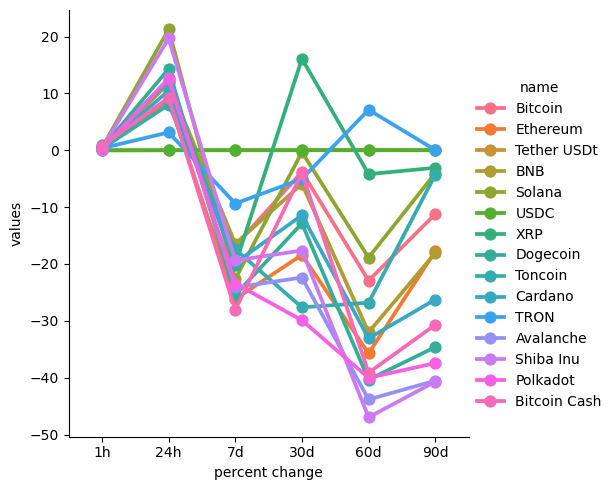

In [321]:
sns.catplot(x='percent change',y='values',hue='name',data=df5,kind='point') # hue is used to add color coding to different categories strip might provide a fine visualization but others won't work at all 

In [337]:
df10=df[['name','quote.USD.price','timestamp']]

In [339]:
df10

,name,quote.USD.price,timestamp
0,Bitcoin,55284.57968,2024-08-06 17:22:13.065101
1,Ethereum,2464.67937,2024-08-06 17:22:13.065101
2,Tether USDt,1.00044,2024-08-06 17:22:13.065101
3,BNB,480.36113,2024-08-06 17:22:13.065101
4,Solana,140.61177,2024-08-06 17:22:13.065101
5,USDC,1.00013,2024-08-06 17:22:13.065101
6,XRP,0.50582,2024-08-06 17:22:13.065101
7,Dogecoin,0.09653,2024-08-06 17:22:13.065101
8,Toncoin,5.48275,2024-08-06 17:22:13.065101
9,Cardano,0.32525,2024-08-06 17:22:13.065101


In [333]:
#df10=df10[df10['name']=='Bitcoin']

In [344]:
df10=df10.query("name=='Bitcoin'") # to filter data

In [352]:
df10

,name,quote.USD.price,timestamp
0,Bitcoin,55284.57968,2024-08-06 17:22:13.065101
0,Bitcoin,55211.62903,2024-08-06 17:31:59.011640
0,Bitcoin,55331.39622,2024-08-06 17:33:00.167275
0,Bitcoin,55209.99941,2024-08-06 17:34:34.547528
0,Bitcoin,55209.99941,2024-08-06 17:35:38.072755
0,Bitcoin,55312.44137,2024-08-06 17:36:40.721231
0,Bitcoin,55369.48201,2024-08-06 17:50:04.430581
0,Bitcoin,55405.89763,2024-08-06 17:51:07.053348
0,Bitcoin,55385.77503,2024-08-06 17:55:12.080399
0,Bitcoin,55385.77503,2024-08-06 17:55:25.632901


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

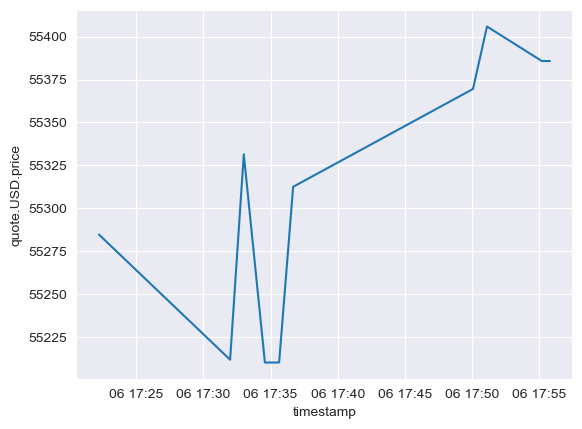

In [362]:
sns.set_style("darkgrid")
sns.lineplot(x='timestamp',y='quote.USD.price',data=df10)